In [1]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data.csv')

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.initial_prediction = None
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, x, y):

        np.random.seed(self.random_state)
        x, y = np.array(x), np.array(y)


        self.initial_prediction = np.mean(y)
        residuals = y - self.initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(x, residuals)
            self.trees.append(tree)

            predictions = tree.predict(x)
            residuals -= self.learning_rate * predictions

    def predict(self, X):

        X = np.array(X)
        predictions = np.full(X.shape[0], self.initial_prediction)

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions

In [10]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from model_analysis import *

evaluation_metrics(y_test, y_pred)

Ortalama Mutlak Hata 0.2603219945316071
Ortalama Karesel Hata: 0.13340277238111403
Kök Ortalama Karesel Hata: 0.36524344262575614
R² Skor: 0.8052821805592987


In [13]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,632271.009802
160001.0,226602.968890
334001.0,315971.109943
399001.0,465901.795252
284901.0,200164.628205
...,...
154901.0,76274.371289
23001.0,61469.751666
359901.0,428811.172275


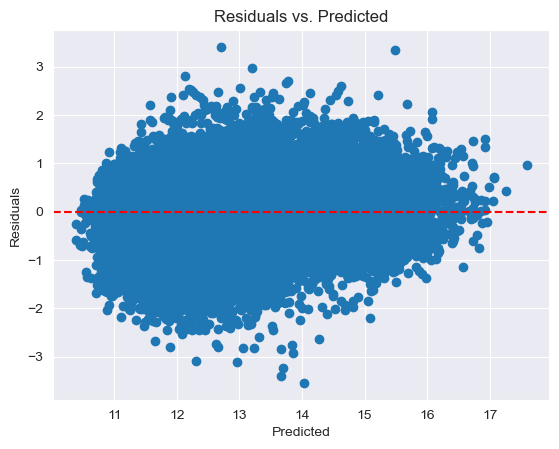

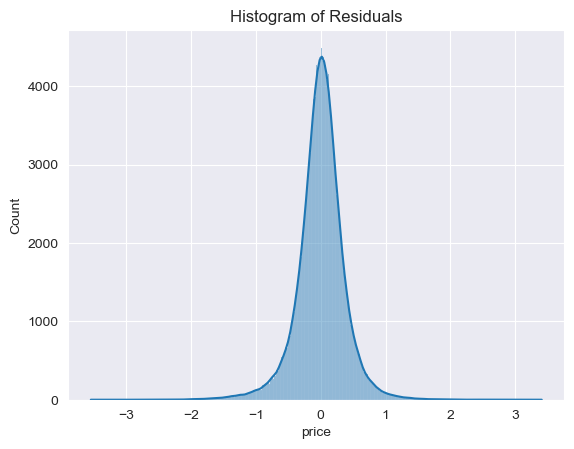

In [14]:
residual_analysis(y_test, y_pred)